# Crowdfunding Visual Data Analysis

# Table of contents
1. [Introduction](#introduction)
2. [Descriptive Statistics](#descriptivestatistics)
3. [Univariate Exploration](#univariateexploration)

# Introduction <a name="introduction"></a>
Some introduction text, formatted in heading 2 style


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# style settings
# uncoment the below to avoid collapsing of dataframes
# pd.set_option('display.max_rows', 2500)
# pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)

## Launch data and prepare for analysis

In [2]:
file_name =  './data/kickstarter_master{}.csv'
master_df = pd.concat([pd.read_csv(file_name.format(i)) for i in range(1,4)])
master_df.reset_index(drop=True, inplace=True)
master_df.head()

,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,...,staff_pick,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
0,3707841,Pobasso and the Cucumbers - Historical Musical for Schools,https://www.kickstarter.com/projects/pobasso/pobasso-and-the-cucumbers-historical-musical-for-s,"School Musical, set 300 years ago, focusing on the cultural and relationship between the Aboriginal people and the Macassan Fishermen",Art,Performance Art,https://ksr-ugc.imgix.net/assets/024/717/542/6be468560e102332cdb781dc53aa39e2_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1554855643&auto=format&frame=1&q=92&s=370a1902aa4d134c25eeae0238fe7868,pobasso-and-the-cucumbers-historical-musical-for-s,2019-04-10 00:00:39,2019-04-18 04:49:38,...,False,AUD,3500.0,2424.109352,2406.722637,0.0,0.0,0.0,1.443829,1.45426
1,3703851,U R invited 2 A Funk Show for Mommy's 41st,https://www.kickstarter.com/projects/2creativegabe/u-r-invited-2-a-funk-show-for-mommys-41st,"""Don't Stop"" and Frankie Hernandez Band at the Band Shell in Ashland, Oregon 4/28 1PM-3PM",Music,World Music,https://ksr-ugc.imgix.net/assets/024/815/131/12ed907202f85c26d3659cb188005010_original.png?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1555561655&auto=format&frame=1&q=92&s=1907fe22541e94b905bb2f85b40a9d89,u-r-invited-2-a-funk-show-for-mommys-41st,2019-04-04 12:23:13,2019-04-18 04:37:08,...,False,USD,2000.0,2000.000000,2000.000000,0.0,0.0,0.0,1.000000,1.00000
2,3547680,The third generation of amphibious six-wheel tumbling car,https://www.kickstarter.com/projects/1601343788/the-third-generation-of-amphibious-six-wheel-tumbl,The third generation of amphibious six-wheel remote control tumbling car,Technology,Hardware,https://ksr-ugc.imgix.net/assets/023/718/126/8ea2e08d17bc81aa7d7d1b18c38ef075_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1546849358&auto=format&frame=1&q=92&s=69a478eb7656f09de808339109ca512f,the-third-generation-of-amphibious-six-wheel-tumbl,2019-01-06 02:50:54,2019-04-18 04:06:36,...,False,HKD,10000.0,1273.962161,1274.135249,0.0,0.0,0.0,7.849527,7.84846
3,3524160,Star Wars: Dawn of the Chase,https://www.kickstarter.com/projects/thechase/star-wars-dawn-of-the-chase,"A prequel to Star Wars: The Chase. It holds intense lightsaber fights, a to be tragic friendship, and fun for Star Wars fans everywhere",Film & Video,Science Fiction,https://ksr-ugc.imgix.net/assets/023/403/716/a1a90cba3b7f5d54f015835f74436550_original.JPG?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1543362495&auto=format&frame=1&q=92&s=8ed4c9a9727712e3acd2818c910637f5,star-wars-dawn-of-the-chase,2018-11-27 23:43:25,2019-04-18 03:39:51,...,False,USD,7000.0,7000.000000,7000.000000,1.0,1.0,1.0,1.000000,1.00000
4,3706839,Magick Charms! A unique witchy pin Kickstarter,https://www.kickstarter.com/projects/fernwehfreya/magick-charms-a-unique-witchy-pin-kickstarter,Unique charms made into pins to bring you luck and magick.,Art,Digital Art,https://ksr-ugc.imgix.net/assets/024/814/435/1bc5c4fa965a12c2e5d4329256a10689_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1555556537&auto=format&frame=1&q=92&s=54a2e7906c01ef539673012b479192cf,magick-charms-a-unique-witchy-pin-kickstarter,2019-04-08 20:00:58,2019-04-18 03:37:10,...,False,USD,300.0,300.000000,300.000000,0.0,0.0,0.0,1.000000,1.00000


In [3]:
# Create a separate data frame for completed project only
ks_compl = master_df.query('(status == "successful") | (status == "failed")')
ks_compl.status.value_counts()

successful    95452
failed        74213
Name: status, dtype: int64

In [4]:
# To category
master_df['country'] = master_df['country'].astype('category')
master_df['currency'] = master_df['currency'].astype('category')
master_df['status'] = master_df['status'].astype('category')
master_df['category'] = master_df['category'].astype('category')
master_df['subcategory'] = master_df['subcategory'].astype('category')

# to date time
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']] = master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']].apply(pd.to_datetime)

In [5]:
# engineer variable to asses funding duration
master_df['duration'] = master_df['deadline'] - master_df['launched_at']
master_df[['launched_at', 'deadline', 'duration']].sample(10)

,launched_at,deadline,duration
151202,2014-06-02 22:07:51,2014-07-11 21:00:00,38 days 22:52:09
61803,2017-02-14 19:08:34,2017-03-22 20:00:00,36 days 00:51:26
65643,2016-12-18 19:09:14,2017-01-16 22:45:00,29 days 03:35:46
62321,2017-02-08 04:48:10,2017-03-02 04:48:10,22 days 00:00:00
66890,2016-11-28 18:35:58,2017-01-27 18:35:58,60 days 00:00:00
58012,2017-04-01 08:57:55,2017-04-14 22:00:00,13 days 13:02:05
2814,2019-03-25 19:05:44,2019-04-24 19:05:44,30 days 00:00:00
62805,2017-02-01 13:31:21,2017-02-22 23:00:00,21 days 09:28:39
98004,2015-11-01 21:19:33,2015-12-07 04:59:00,35 days 07:39:27
144450,2014-08-02 11:12:20,2014-09-01 11:12:20,30 days 00:00:00


In [6]:
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at', 'duration']].head()

,created_at,launched_at,state_changed_at,deadline,last_update_at,duration
0,2019-04-10 00:00:39,2019-04-18 04:49:38,2019-04-18 04:49:38,2019-06-02 04:49:38,2019-04-10 00:00:39,45 days 00:00:00
1,2019-04-04 12:23:13,2019-04-18 04:37:08,2019-04-18 04:37:08,2019-05-08 04:37:08,2019-04-04 12:23:13,20 days 00:00:00
2,2019-01-06 02:50:54,2019-04-18 04:06:36,2019-04-18 04:06:36,2019-06-17 04:06:36,2019-01-06 02:50:54,60 days 00:00:00
3,2018-11-27 23:43:25,2019-04-18 03:39:51,2019-04-18 03:39:52,2019-06-02 03:39:51,2018-11-27 23:43:25,45 days 00:00:00
4,2019-04-08 20:00:58,2019-04-18 03:37:10,2019-04-18 03:37:11,2019-05-20 16:11:00,2019-04-08 20:00:58,32 days 12:33:50


In [7]:
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at', 'duration']].tail()

,created_at,launched_at,state_changed_at,deadline,last_update_at,duration
182822,2009-04-22 02:11:10,2009-05-01 15:44:25,2009-06-05 07:00:24,2009-06-05 06:59:00,2015-03-09 15:43:20,34 days 15:14:35
182823,2009-05-01 11:38:34,2009-05-01 12:22:21,2009-05-31 11:45:17,2009-05-31 11:38:00,2015-03-09 15:43:20,29 days 23:15:39
182824,2009-04-29 19:52:44,2009-04-29 21:11:15,2009-06-15 19:00:31,2009-06-15 19:00:00,2015-03-09 15:43:20,46 days 21:48:45
182825,2009-04-29 16:40:26,2009-04-29 20:08:13,2009-07-04 16:45:20,2009-07-04 16:40:00,2015-03-09 15:43:20,65 days 20:31:47
182826,2009-04-27 04:44:17,2009-04-28 11:55:41,2009-05-16 10:00:25,2009-05-16 09:59:00,2015-03-09 15:43:20,17 days 22:03:19



# Descriptive Statistics <a name="descriptivestatistics"></a>
Some introduction text, formatted in heading 2 style

In [8]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182827 entries, 0 to 182826
Data columns (total 34 columns):
project_id                 182827 non-null int64
project_name               182827 non-null object
url                        182827 non-null object
blurb                      182827 non-null object
category                   182827 non-null category
subcategory                182827 non-null category
image                      182827 non-null object
slug                       182827 non-null object
created_at                 182827 non-null datetime64[ns]
launched_at                182827 non-null datetime64[ns]
deadline                   182827 non-null datetime64[ns]
state_changed_at           182827 non-null datetime64[ns]
last_update_at             182827 non-null datetime64[ns]
status                     182827 non-null category
creator_id                 182827 non-null int64
creator_name               182826 non-null object
country                    182818 non-null ca

In [9]:
master_df[master_df.creator_name.isna()]

,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,...,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd),duration
93244,2298709,Cannabis Colouring Book,https://www.kickstarter.com/projects/498969171/cannabis-colouring-book,"A Cannabis Colouring Book, 20 black and white prints by a Fine Artist",Art,Conceptual Art,https://ksr-ugc.imgix.net/assets/012/342/732/d13264538144cbd88347a1b50579e6e4_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463756060&auto=format&frame=1&q=92&s=34c74564f1ce4b2795e93c1644d68674,cannabis-colouring-book,2015-12-31 05:21:47,2015-12-31 18:31:24,...,USD,2500.0,2500.0,2500.0,4.2,4.2,4.2,1.0,1.0,30 days


In [10]:
projects_unique = master_df.project_id.nunique()
projects_unique

182827

In [11]:
creators_unique = master_df.creator_id.nunique()
creators_unique

157734

In [12]:
master_df.describe()

,project_id,creator_id,backers_count,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd),duration
count,1.828270e+05,1.828270e+05,182827.000000,1.828270e+05,1.828270e+05,1.828270e+05,1.828270e+05,1.828270e+05,1.828270e+05,182827.000000,182827.000000,182827
mean,2.134010e+06,1.074357e+09,133.195939,5.304478e+04,4.351351e+04,4.447860e+04,1.557646e+04,1.151256e+04,1.169987e+04,1.478197,1.455148,32 days 22:02:48.196382
std,1.067351e+06,6.200079e+08,872.129691,1.253259e+06,1.137831e+06,1.171763e+06,2.768409e+05,8.525513e+04,8.618762e+04,4.607058,4.643059,11 days 21:28:48.152456
min,1.900000e+01,3.000000e+00,0.000000,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.787864,0.582605,1 days 00:00:00
25%,1.316340e+06,5.376327e+08,3.000000,1.500000e+03,1.500000e+03,1.500000e+03,7.200000e+01,6.100000e+01,6.300000e+01,1.000000,1.000000,29 days 23:00:00
50%,2.256628e+06,1.073326e+09,23.000000,5.000000e+03,5.000000e+03,5.000000e+03,1.252000e+03,1.173538e+03,1.200000e+03,1.000000,1.000000,30 days 00:00:00
75%,3.087906e+06,1.611913e+09,80.000000,1.500000e+04,1.350000e+04,1.422180e+04,6.062000e+03,5.725325e+03,5.839180e+03,1.000000,1.000000,35 days 00:00:00
max,3.713426e+06,2.147483e+09,105857.000000,1.000000e+08,1.269255e+08,1.500993e+08,8.103074e+07,1.044117e+07,1.044117e+07,109.448116,113.940122,93 days 02:32:04


In [13]:
ks_compl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169665 entries, 573 to 182826
Data columns (total 33 columns):
project_id                 169665 non-null int64
project_name               169665 non-null object
url                        169665 non-null object
blurb                      169665 non-null object
category                   169665 non-null object
subcategory                169665 non-null object
image                      169665 non-null object
slug                       169665 non-null object
created_at                 169665 non-null object
launched_at                169665 non-null object
deadline                   169665 non-null object
state_changed_at           169665 non-null object
last_update_at             169665 non-null object
status                     169665 non-null object
creator_id                 169665 non-null int64
creator_name               169664 non-null object
country                    169656 non-null object
city                       169665 non-n

In [14]:
ks_compl.describe()

,project_id,creator_id,backers_count,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
count,1.696650e+05,1.696650e+05,169665.000000,1.696650e+05,1.696650e+05,1.696650e+05,1.696650e+05,1.696650e+05,1.696650e+05,169665.000000,169665.000000
mean,2.097850e+06,1.074555e+09,139.441346,4.833759e+04,4.000323e+04,4.090566e+04,1.629429e+04,1.201808e+04,1.221735e+04,1.460439,1.437195
std,1.062318e+06,6.204188e+08,878.212002,1.157584e+06,1.072481e+06,1.106017e+06,2.859968e+05,8.425169e+04,8.526236e+04,4.540574,4.574976
min,1.900000e+01,3.000000e+00,0.000000,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.787864,0.582605
25%,1.274156e+06,5.365875e+08,3.000000,1.500000e+03,1.500000e+03,1.500000e+03,1.000000e+02,8.800000e+01,9.012084e+01,1.000000,1.000000
50%,2.220164e+06,1.073975e+09,26.000000,5.000000e+03,5.000000e+03,5.000000e+03,1.499000e+03,1.381697e+03,1.417550e+03,1.000000,1.000000
75%,3.047911e+06,1.612919e+09,85.000000,1.500000e+04,1.269255e+04,1.319427e+04,6.460000e+03,6.149000e+03,6.243000e+03,1.000000,1.000000
max,3.705509e+06,2.147483e+09,105857.000000,1.000000e+08,1.269255e+08,1.500993e+08,8.103074e+07,8.596475e+06,8.596475e+06,109.448116,113.940122


In [15]:
n_compl_projects = ks_compl.project_id.nunique()
n_compl_projects

169665

### Project success

In [16]:
master_df.status.value_counts()

successful    95452
failed        74213
canceled      8587 
live          3945 
suspended     630  
Name: status, dtype: int64

In [17]:
n_success = len(master_df[master_df.status == "successful"])
n_failed = len(master_df[master_df.status == "failed"])
n_live = len(master_df[master_df.status == "live"])
n_canceled = len(master_df[master_df.status == "canceled"])
n_suspended = len(master_df[master_df.status == "suspended"])

In [18]:
# all projects
p_success = n_success / projects_unique
p_failed = n_failed / projects_unique
p_live = n_live / projects_unique 
p_canceled = n_canceled / projects_unique
p_suspended = n_suspended / projects_unique
print("Success: {}%".format(round(p_success*100,2)))
print("Failed: {}%".format(round(p_failed*100, 2)))
print("Canceled: {}%".format(round(p_canceled*100, 2))) 
print("Live: {}%".format(round(p_live*100, 2)))
print("Suspended: {}%".format(round(p_suspended*100, 2))) 

Success: 52.21%
Failed: 40.59%
Canceled: 4.7%
Live: 2.16%
Suspended: 0.34%


In [19]:
# completed projects
n_compl_success = len(ks_compl[ks_compl.status == "successful"])
n_compl_fail = len(ks_compl[ks_compl.status == "failed"])
p_compl_success = n_compl_success / n_compl_projects
p_compl_fail = n_compl_fail / n_compl_projects
print("Success: {}%".format(round(p_compl_success*100,2)))
print("Failed: {}%".format(round(p_compl_fail*100, 2)))


Success: 56.26%
Failed: 43.74%


In [20]:
# how many prFind ojects do people usually start?
n_compl_creators_unique = ks_compl.creator_id.nunique()
n_compl_creators_unique

147272

In [33]:
power_users = (ks_compl['creator_id'].value_counts()
        .reset_index()
        .rename(index=str, columns={"creator_id": "project_count"})['project_count']
        .value_counts()
        .reset_index()
        .rename(index=str, columns={"index": "project_count", "project_count": "creator_count"})
        .sort_values(by='project_count', ascending=False))

power_users

,project_count,creator_count
35,70,1
32,58,1
26,52,1
27,36,1
28,34,1
29,33,1
25,32,1
31,31,1
24,30,2
23,27,2


In [45]:
creators_ordered = ks_compl.creator_id.value_counts().index
creators_ordered

Int64Index([2104052526,  957058942,  978911160, 1323060510, 1655558466,
            2039317553,  578114575,  863477191,   63602967, 1229765692,
            ...
            1348383811,  919528270, 1963641068, 2053489515,  687209324,
            1377956717, 1473375086, 1278544754,    1127285, 1221978673],
           dtype='int64', length=147272)

In [43]:
# most active user - most projects
print(f"username: {ks_compl[ks_compl.creator_id == creators_ordered[0]]['creator_name'].iloc[0]}")
ks_compl[ks_compl.creator_id == creators_ordered[0]]

username: Collectable Playing Cards


,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,...,staff_pick,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
11965,3504998,Bicycle Stained Glass Leviathan Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-stained-glass-leviathan-playing-cards,The Leviathan Sea Monster takes form as the 3rd edition in the Stained Glass Series.,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/023/106/899/546300f9aaa4639b67d4f1c1fdf613c4_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1541093879&auto=format&frame=1&q=92&s=1b23fe9f9f96f9682cc5cbe6b6d432e7,bicycle-stained-glass-leviathan-playing-cards,2018-11-01 17:36:54,2018-11-26 19:35:05,...,False,USD,4000.0,4000.0,4000.0,13687.00,13687.00,13687.00,1.0,1.0
16122,3372265,BICYCLE MARBLE Playing Cards by Max,https://www.kickstarter.com/projects/2104052526/bicycle-marble-playing-cards-by-max,The NEW GENERATION of the TEXTURE SERIES by Max (Max Playing Cards),Games,Playing Cards,https://ksr-ugc.imgix.net/assets/021/478/957/e96e0d3d393a63dacfd7e344d129c6ef_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1528219862&auto=format&frame=1&q=92&s=6209fd92d37889a1b6fa54e1c2b2d4c3,bicycle-marble-playing-cards-by-max,2018-05-02 15:11:24,2018-10-10 15:09:57,...,False,USD,13000.0,13000.0,13000.0,10612.00,10612.00,10612.00,1.0,1.0
17503,3460006,Bicycle Limited Edition Bald Eagle Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-limited-edition-bald-eagle-playing-cards,"The emblem bird of the United States The Bald Eagle, is now a limited edition Bicycle playing card deck. Only 1100 decks will printed.",Games,Playing Cards,https://ksr-ugc.imgix.net/assets/022/396/885/5ff1a0277e1888ba564c60ced85a6e79_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1535652459&auto=format&frame=1&q=92&s=2d6e0c095b7076b751b578a6e9c6a2b5,bicycle-limited-edition-bald-eagle-playing-cards,2018-08-30 18:06:23,2018-09-25 18:01:14,...,False,USD,3000.0,3000.0,3000.0,3523.00,3523.00,3523.00,1.0,1.0
19789,3455599,Bicycle Explostar Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-cardistry-explostar-playing-cards,Collectable Playing Cards first Cardistry deck is ready and set to explode onto the scene!,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/022/434/593/3614340c9b7ee19263c6e965308a0a49_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1536003495&auto=format&frame=1&q=92&s=26a8eb63300ff6bfade972d51951e06a,bicycle-cardistry-explostar-playing-cards,2018-08-24 17:34:07,2018-08-30 16:18:25,...,False,USD,4000.0,4000.0,4000.0,4755.00,4755.00,4755.00,1.0,1.0
21264,3427450,Bicycle Limited Edition Gyrfalcon Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-limited-edition-gyrfalcon-playing-cards,The largest falcon in the world now a limited edition Bicycle playing cards deck. Only 1100 decks will be printed.,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/021/929/296/8d2e381918b619c18c29c95aa4b644fd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1533147729&auto=format&frame=1&q=92&s=70452f0ae9587e62d6e39ad6ca6452b3,bicycle-limited-edition-gyrfalcon-playing-cards,2018-07-17 17:46:30,2018-08-10 16:07:32,...,False,USD,2500.0,2500.0,2500.0,9533.00,9533.00,9533.00,1.0,1.0
26269,3393416,Bicycle Antiques Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-antiques-playing-cards,Travel back in time with the Bicycle Antiques Deck,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/021/410/331/381c47b3818858487e85c739bf52bce6_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1527704269&auto=format&frame=1&q=92&s=abf9a7ec8eb63b29cc414553a2bea5d9,bicycle-antiques-playing-cards,2018-05-30 18:17:26,2018-06-08 17:58:10,...,False,USD,5000.0,5000.0,5000.0,2305.00,2305.00,2305.00,1.0,1.0
27892,3377666,Bicycle Carnival Playing Cards & S

User with most projects is "Collectable Playing Cards" who is funding Bicycle themed playing cards. 

147,272 users created 169,665 projects. Users usually create one project, but there are power users with a max of 70 projects.

We got a data set consisting of 17,888 Kickstarter projects over the time period of 10 years of Kickstarter's existence. The first projects are from April 2009 and the youngest projects ended in May 2019. 

# Univariate Exploration <a name='univariateexploration'></a>
Let's start our exploration by looking at the main domain of interest: How successful were projects? 


### Bar charts for categorical data

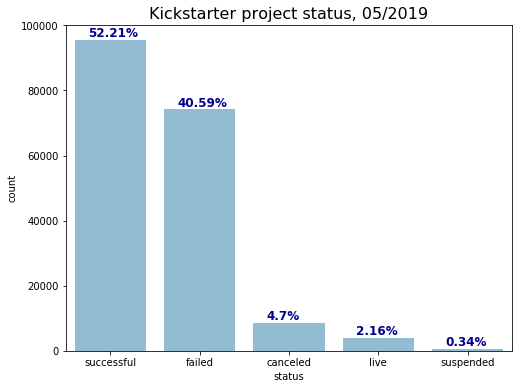

In [22]:
# style
base_color = sns.color_palette("Blues_r")[3]
plt.figure(figsize=[8,6])

# create ordering
order = master_df.status.value_counts().index

# plot
ax = sns.countplot(data=master_df, x='status', color=base_color, order=order);

# annotate
plt.title("Kickstarter project status, 05/2019", fontsize=16)
for p in ax.patches:
    ax.text(p.get_x()+0.15, p.get_height()+1000, str(round((p.get_height()/projects_unique)*100,2)) + '%', fontsize=12, color='darkblue', weight='bold')


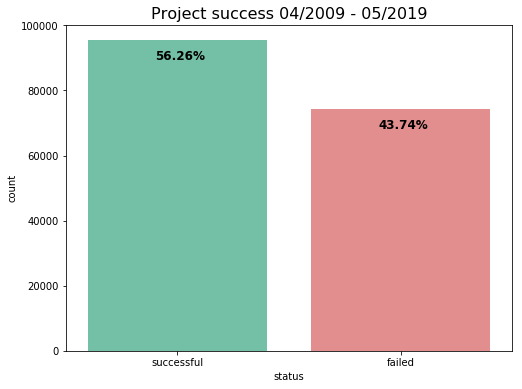

In [23]:
# style
cust_color = ["#66cdaa", "#f08080"]
plt.figure(figsize=[8,6])

# create ordering
order = ks_compl.status.value_counts().index

# plot
ax = sns.countplot(data=ks_compl, x='status', color=sns.set_palette(cust_color), order=order);

# annotate
plt.title("Project success 04/2009 - 05/2019", fontsize=16)
for p in ax.patches:
    ax.text(p.get_x()+0.3, p.get_height()-6000, str(round((p.get_height()/ n_compl_projects)*100,2)) + '%', fontsize=12, color='black', weight='bold')

### Categories and Subcategories

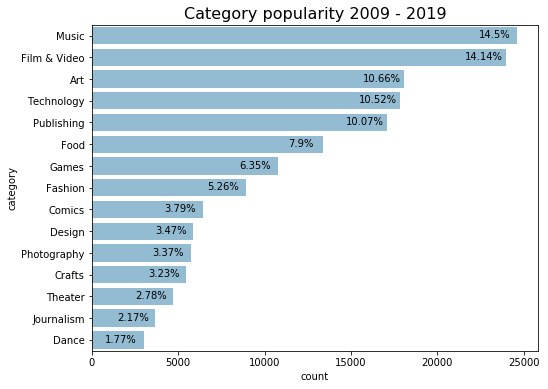

In [24]:
base_color = sns.color_palette("Blues_r")[3]
plt.figure(figsize=[8,6])

# create ordering
order = ks_compl.category.value_counts().index
cat_counts = ks_compl.category.value_counts()

# plot
ax = sns.countplot(data=ks_compl, y='category', color=base_color, order=order);

# annotate
plt.title("Category popularity 2009 - 2019", fontsize=16);
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count-1300, loc+0.1, cat_rate, ha='center', color="black")

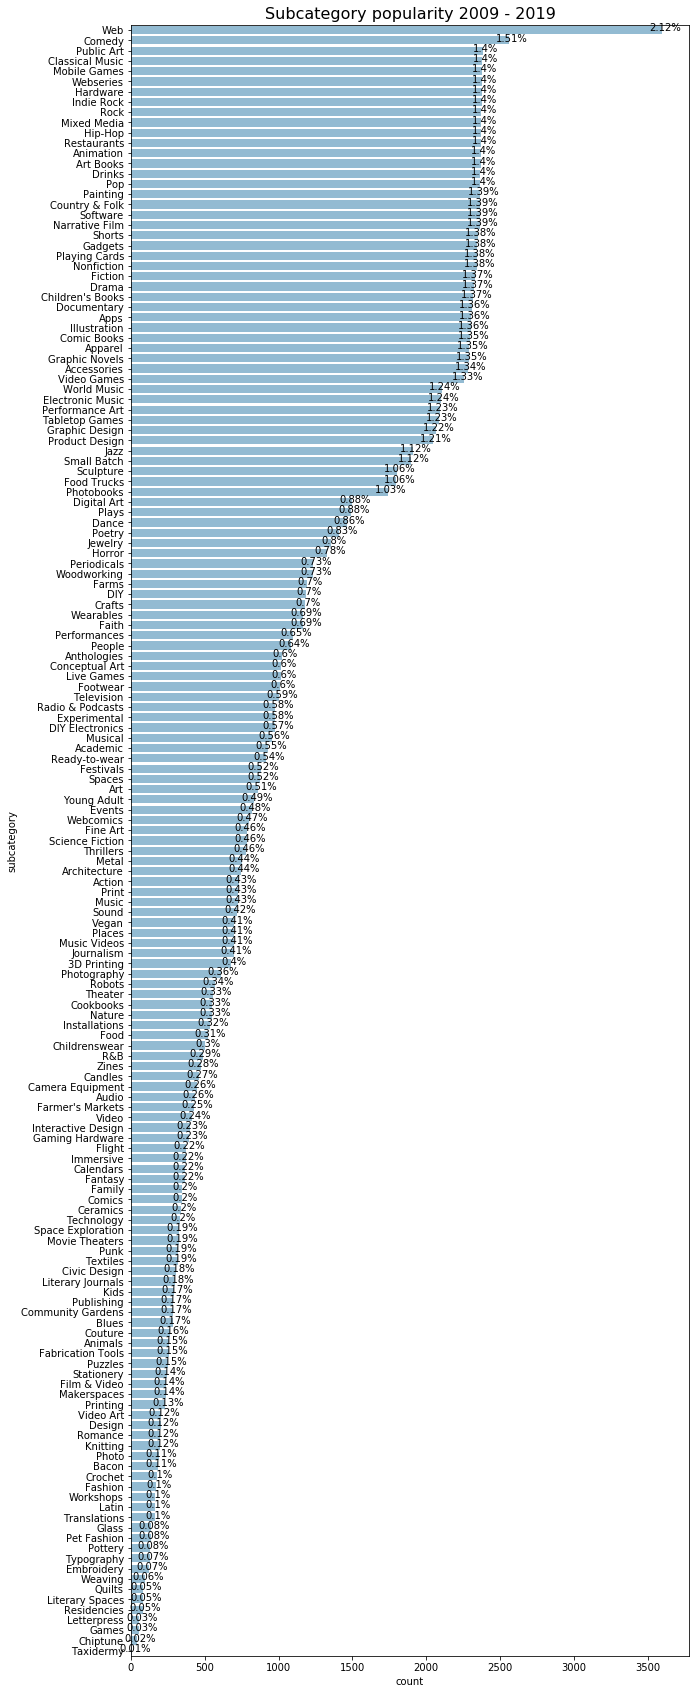

In [25]:
base_color = sns.color_palette("Blues_r")[3]
plt.figure(figsize=[10,30])

# create ordering
order = ks_compl.subcategory.value_counts().index
cat_counts = ks_compl.subcategory.value_counts()

# plot
ax = sns.countplot(data=ks_compl, y='subcategory', color=base_color, order=order);

# annotate
locs, labels = plt.yticks() 
plt.title("Subcategory popularity 2009 - 2019", fontsize=16);
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count+20, loc+0.1, cat_rate, ha='center', color="black")

### Subplots for subcategories of most popular categories

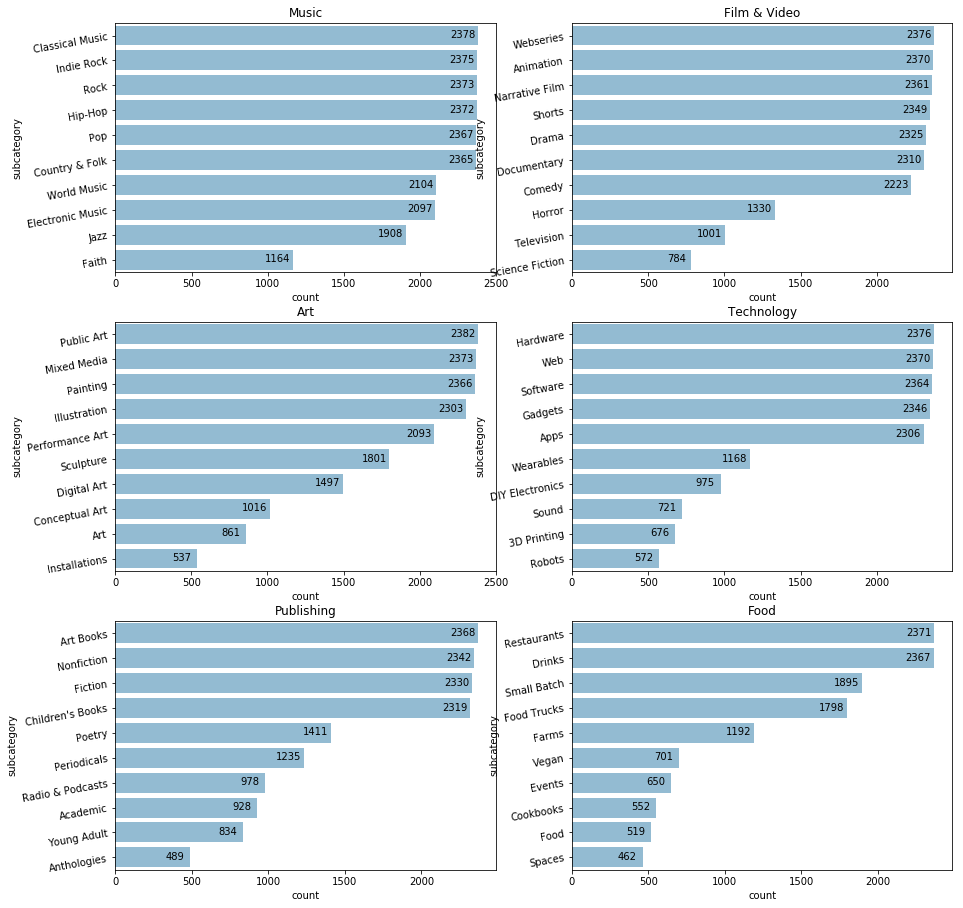

In [26]:
# Let's look at the most categories in depth
base_color = sns.color_palette("Blues_r")[3]
plt.figure(figsize=[15,12])

# take a look on most popular categories
pop_cat = ks_compl.category.value_counts().index
# # subplots
for i, cat in enumerate(pop_cat[:6]):
        ks_compl_cat = ks_compl.query('category == @cat')
        order = ks_compl_cat.subcategory.value_counts()[:10].index
        cat_counts = ks_compl_cat.subcategory.value_counts()
        plt.subplot(3, 2, i+1)
        plt.yticks(rotation=10)
        ax = sns.countplot(data=ks_compl_cat, y='subcategory', color=base_color, order=order);
        plt.subplots_adjust(bottom=-0.1)
        
        # annotate
        plt.title(f"{cat}")
        locs, labels = plt.yticks()
        for loc, label in zip(locs, labels):
            count = cat_counts[label.get_text()]
            plt.text(count-100, loc+0.1, count, ha='center', color="black")


# Bivariate explorations

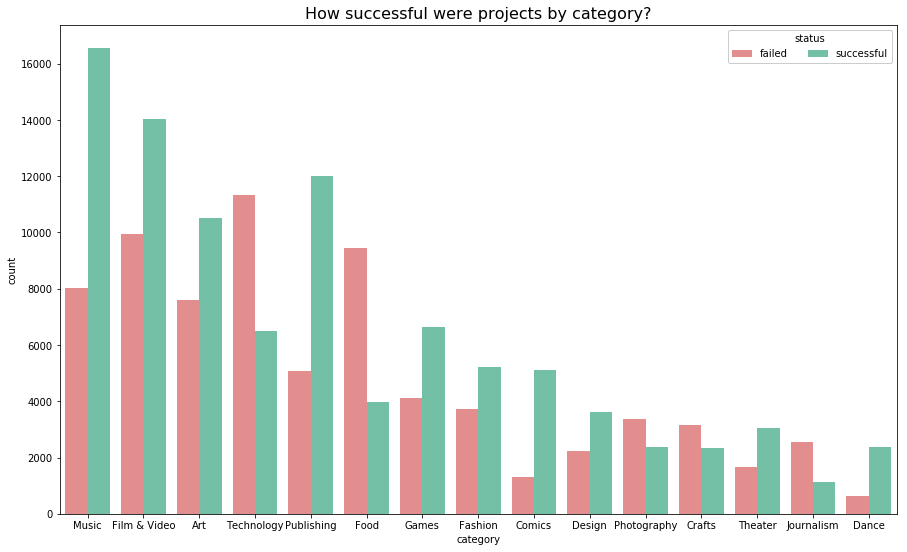

In [29]:
# find out what project categories are success predictors
plt.figure(figsize=[15,9])
cust_color = ["#f08080", "#66cdaa"]
# clustered bar chart qualitative vs qualitative

# seaborn countplot
ax = sns.countplot(data = ks_compl, x = 'category', hue = 'status', color = sns.set_palette(cust_color), order=ks_compl.category.value_counts().index)

# reset legend to avoid overlap
ax.legend(loc = 'upper right', ncol = 3, framealpha = 1, title = 'status')

# annotate
plt.title("How successful were projects by category?", fontsize=16);

As we visualize absolute values above, we may misinterpret the actual success rates. In the graph below, we calculate relative frequencies for each category.  

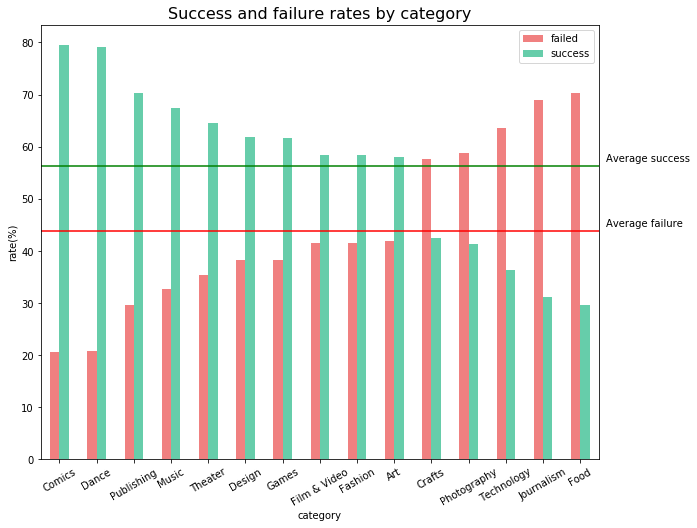

In [30]:

pop_cats = ks_compl.category.value_counts().index
cat_counts = ks_compl.category.value_counts()

# calculate success and failure rates
def calc_rate(category, status):
    cat_df = ks_compl[ks_compl.category == category]
    cat_len = len(cat_df)
    cat_status_len = len(cat_df[cat_df.status == status])
    return (cat_status_len / cat_len) * 100 

cat_success = [calc_rate(cat,"successful") for cat in pop_cats]
cat_failed = [calc_rate(cat,"failed") for cat in pop_cats]

# p_compl_success = n_compl_success / n_compl_projects
# p_compl_fail = n_compl_fail / n_compl_projects

# create a new dataframe based success and failure rates
df = pd.DataFrame({'failed': cat_failed, 'success': cat_success,}, index=pop_cats)

# order by success rates
df.sort_values(by=['success'], ascending=False, inplace=True)

# plot
ax = df.plot.bar(rot=30, figsize=(10,8));

# plot means
plt.axhline(p_compl_success*100, color='g')
plt.axhline(p_compl_fail*100, color='r')

# annotate
plt.title("Success and failure rates by category", fontsize=16);
plt.text(14.7, p_compl_success*100+1, "Average success")
plt.text(14.7, p_compl_fail*100+1, "Average failure")
plt.ylabel("rate(%)")
plt.xlabel("category")
plt.show()

What are predictors of a project's failure and success?  
Why are projects usually canceled or suspended?  
What type of tech projects work in Kickstarter?  